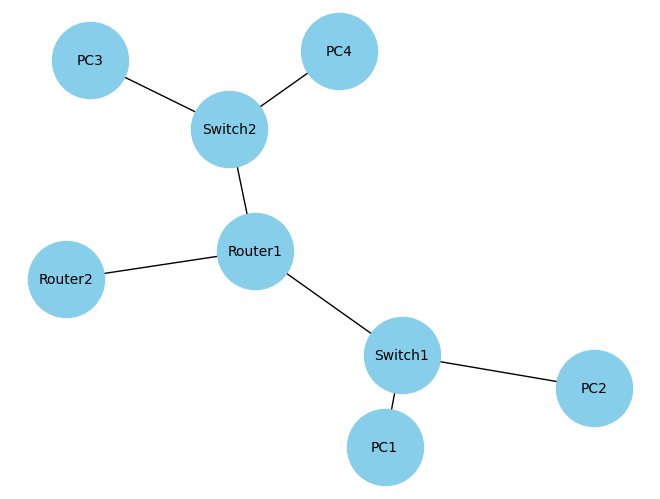

Path from PC1 to PC3: PC1 -> Switch1 -> Router1 -> Switch2 -> PC3


In [63]:
"""
Simulación Completa de una Red Corporativa

Objetivo: Diseñar y simular una red corporativa completa utilizando Python. La red debe incluir
routers, switches, y dispositivos finales con direccionamiento IP. Se debe implementar el
enrutamiento estático y dinámico entre subredes, y mostrar la topología de la red
"""

import networkx as nx
import matplotlib.pyplot as plt
from ipaddress import ip_network, ip_address

class Device:
    def __init__(self, name, device_type):
        self.name = name
        self.device_type = device_type
        self.ip_address = None

class Router(Device):
    def __init__(self, name):
        super().__init__(name, 'Router')
        self.routing_table = {}

    def add_route(self, network, next_hop):
        self.routing_table[network] = next_hop

    def get_route(self, ip):
        for network, next_hop in self.routing_table.items():
            if ip in ip_network(network):
                return next_hop
        return None

class Switch(Device):
    def __init__(self, name):
        super().__init__(name, 'Switch')

class PC(Device):
    def __init__(self, name):
        super().__init__(name, 'PC')

class Network:
    def __init__(self):
        self.devices = []
        self.edges = []
    
    def add_device(self, device):
        self.devices.append(device)
    
    def connect(self, device1, device2):
        self.edges.append((device1, device2))
    
    def assign_ip_addresses(self, cidr):
        network = ip_network(cidr)
        hosts = network.hosts()
        for device in self.devices:
            if isinstance(device, PC):
                device.ip_address = str(next(hosts))
    
    def visualize(self):
        G = nx.Graph()
        for device in self.devices:
            G.add_node(device.name)
        
        for edge in self.edges:
            G.add_edge(edge[0].name, edge[1].name)
        
        nx.draw(G, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
        plt.show()
    
    def simulate_traffic(self, src, dst):
        path = nx.shortest_path(self._build_graph(), source=src.name, target=dst.name)
        print(f"Path from {src.name} to {dst.name}: {' -> '.join(path)}")
    
    def _build_graph(self):
        G = nx.Graph()
        for device in self.devices:
            G.add_node(device.name)
        
        for edge in self.edges:
            G.add_edge(edge[0].name, edge[1].name)
        return G

# Crear la red y dispositivos
network = Network()
router1 = Router("Router1")
router2 = Router("Router2")
switch1 = Switch("Switch1")
switch2 = Switch("Switch2")
pc1 = PC("PC1")
pc2 = PC("PC2")
pc3 = PC("PC3")
pc4 = PC("PC4")

# Añadir dispositivos a la red
network.add_device(router1)
network.add_device(router2)
network.add_device(switch1)
network.add_device(switch2)
network.add_device(pc1)
network.add_device(pc2)
network.add_device(pc3)
network.add_device(pc4)

# Conectar dispositivos
network.connect(router1, switch1)
network.connect(router1, switch2)
network.connect(switch1, pc1)
network.connect(switch1, pc2)
network.connect(switch2, pc3)
network.connect(switch2, pc4)
network.connect(router1, router2)

# Asignar direcciones IP
network.assign_ip_addresses('192.168.1.0/24')

# Añadir rutas estáticas
router1.add_route('192.168.1.0/24', 'Router1')
router1.add_route('192.168.2.0/24', 'Router2')
router2.add_route('192.168.1.0/24', 'Router1')
router2.add_route('192.168.2.0/24', 'Router2')

# Visualizar la red
network.visualize()

# Simular tráfico
network.simulate_traffic(pc1, pc3)